In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placenentandscore/placement-dataset.csv


In [7]:
df = pd.read_csv('/kaggle/input/placenentandscore/placement-dataset.csv')

In [8]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [10]:
df.shape

(100, 4)

In [55]:
df.ndim

2

In [71]:
df.tail()

,Unnamed: 0,cgpa,iq,placement
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1
99,99,6.2,113.0,1


In [84]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [85]:
df.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [87]:
df.isna()

,cgpa,iq,placement
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
95,False,False,False
96,False,False,False
97,False,False,False
98,False,False,False


In [88]:
df.isna().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='cgpa', ylabel='iq'>

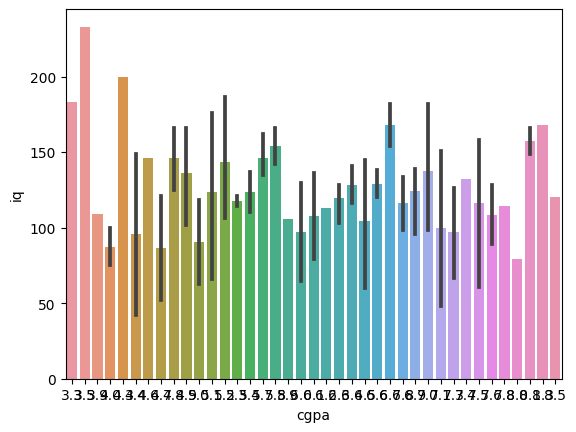

In [90]:
sns.barplot(x='cgpa',y='iq',data=df)

<Axes: xlabel='placement', ylabel='count'>

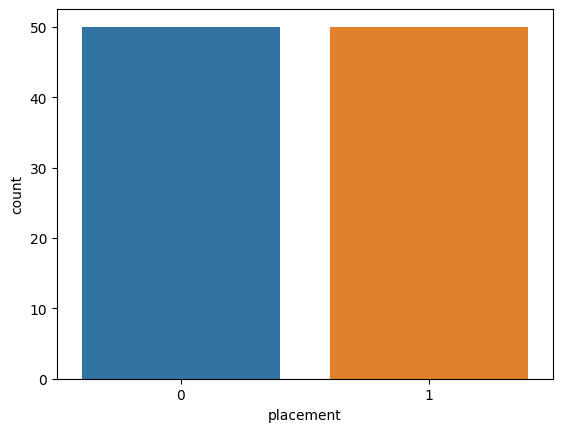

In [91]:
sns.countplot(x='placement',data=df)

In [92]:
 placed = df[df['placement']==1]

In [93]:
placed

,cgpa,iq,placement
0,6.8,123.0,1
3,7.4,132.0,1
5,7.1,48.0,1
10,6.0,45.0,1
11,6.9,138.0,1
13,6.4,116.0,1
20,6.6,120.0,1
21,7.1,151.0,1
26,7.0,199.0,1
27,6.0,124.0,1


<Axes: xlabel='placement', ylabel='iq'>

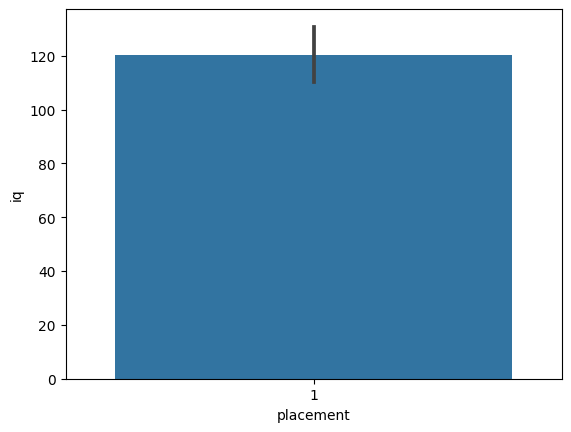

In [94]:
sns.barplot(x='placement',y='iq',data=placed)

<Axes: xlabel='placement', ylabel='iq'>

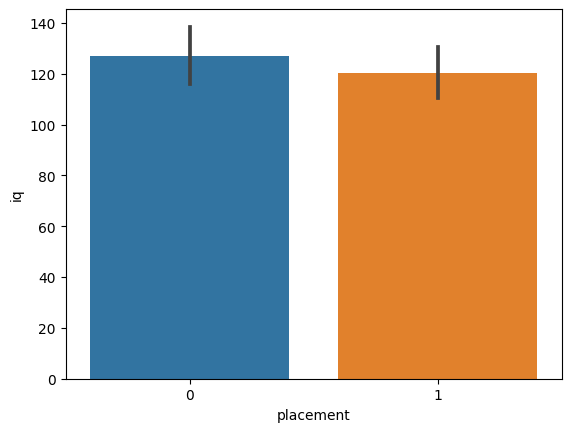

In [95]:
sns.barplot(x='placement',y='iq',data=df)

In [96]:
place=df['placement'].value_counts()


In [97]:
place

placement
1    50
0    50
Name: count, dtype: int64

In [98]:
not_placed = df[df['placement']==0]

In [99]:
not_placed

,cgpa,iq,placement
1,5.9,106.0,0
2,5.3,121.0,0
4,5.8,142.0,0
6,5.7,143.0,0
7,5.0,63.0,0
8,6.1,156.0,0
9,5.1,66.0,0
12,5.4,139.0,0
14,6.1,103.0,0
15,5.1,176.0,0


In [100]:
(not_placed['placement']==0).value_counts()

placement
True    50
Name: count, dtype: int64

In [101]:
input = df[['cgpa','iq']]

In [102]:
input

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [170]:
output = df.iloc[:,-1]
output.shape

(100,)

In [171]:
output

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

<Axes: xlabel='cgpa', ylabel='iq'>

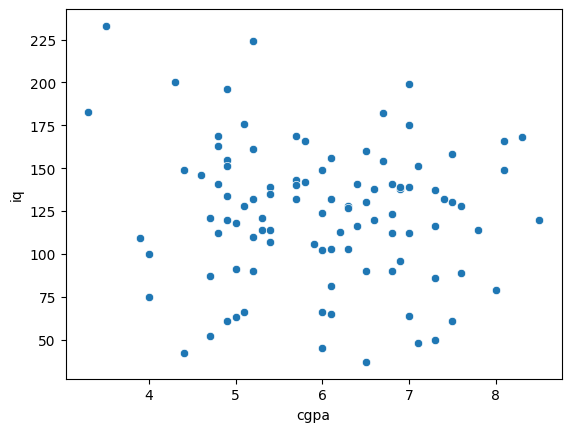

In [172]:
sns.scatterplot(x='cgpa',y='iq',data=df)

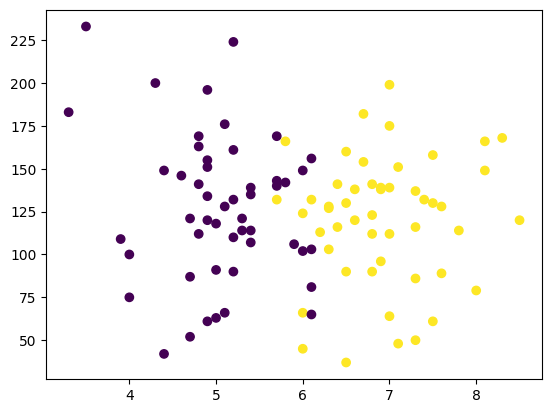

In [173]:
plt.scatter(x=df['cgpa'],y=df['iq'],c=df['placement'])

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
x_train,x_test,y_train,y_test = train_test_split(input,output,test_size=0.1)

In [176]:
x_train

,cgpa,iq
61,7.3,137.0
17,3.3,183.0
91,7.5,158.0
32,7.0,139.0
7,5.0,63.0
...,...,...
70,6.3,127.0
98,6.3,103.0
6,5.7,143.0
51,4.8,141.0


In [177]:
x_test

,cgpa,iq
95,4.3,200.0
84,5.7,169.0
65,8.1,166.0
21,7.1,151.0
75,4.8,169.0
15,5.1,176.0
50,3.5,233.0
49,5.4,135.0
85,5.8,166.0
9,5.1,66.0


In [178]:
from sklearn.preprocessing import StandardScaler

In [179]:
scaler = StandardScaler()


In [180]:
x_train = scaler.fit_transform(x_train)

In [181]:
x_test = scaler.fit_transform(x_test)

In [182]:
from sklearn.linear_model import LogisticRegression

In [183]:
clf = LogisticRegression()
y_train.shape

(90,)

In [184]:
clf.fit(x_train,y_train)

LogisticRegression()

In [187]:
y_pred = clf.predict(x_test)

In [188]:
y_test

95    0
84    0
65    1
21    1
75    0
15    0
50    0
49    0
85    1
9     0
Name: placement, dtype: int64

In [190]:
from sklearn.metrics import accuracy_score

In [191]:
accuracy_score(y_test,y_pred)

0.9

In [192]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

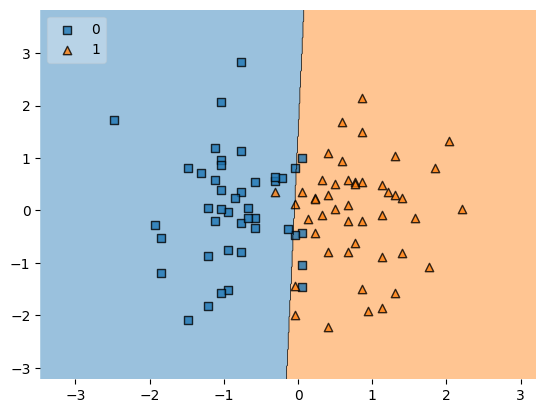

In [194]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [195]:
import pickle

In [196]:

pickle.dump(clf,open('model.pkl','wb'))
